# Finding place for office in Toronto, Canada

## Table of Contents

## Introduction
   The aim of the project is to to formulate a methodology for choosing the best places for an office location based on Foursquera data depending on the specifics of the client’s business.
Business profile defines the infrastructure requirements that should be located in the vicinity of his office. Internet data on the location of social and technological infrastructure allows to optimize the search for the office that best meets the needs of the company.
   
   This project is being implemented as Capstone project by the IBM Data Science Professional Certificate program, which involves
"to leverage the Foursquare location data to explore or compare neighborhoods or cities" or to solve other problems with that data. 

1. Business Problem
2. Data Requirements
3. Data Collection
4. Data Preparation and Description
5. Methodolgy: Modeling and Evaluation
6. Results and Discussion
7. Conclusion

## 1. Business Problem
Choosing the right place for the office is an important task when creating and expanding and modifying any business. At the same time, companies are guided both by the rental price or the cost of commercial real estate, and by the infrastructure that will be necessary to perform the functions of this organization.
Internet data on rental prices, property values, and the placement of infrastructure can help in choosing the best office location. In particular, data from the Foursquare service will be useful for making such decisions.

___We plan to create a methodology for choosing the best place for the office, taking into account the criteria___
- the cost of renting commercial real estate,
- quality ratings of the proposed premises,
- requirements for infrastructure facilities,
based on the use of Foursquera data and other online resources.
For example, we will use data from Toronto (Canada), in which the company organizing international conferences and forums plans to open its new office.
To do business, this company needs:
- low rental prices of commercial real estate;
- the presence of a first-class business or conference center near the office;
- availability of high-class hotels and restaurants near the conference center;
- proximity of tourist and cultural sites, as well as sports facilities for organizing the rest of conference participants.

__This methodology can be used__
- realtors and brokers engaged in operations with commercial real estate,
- tenants choosing a location for offices,
- potential landlords who form commercial offers for the market.


## 2. Data Requirements
To analyze the potential locations for the office of the company organizing international meetings and conferences, we need information:
1. About the conference and business centers of Toronto, in which it is possible to rent premises to organize these events.
2. About ratings and rental prices of these areas.
3. About tourist and cultural infrastructure facilities, as well as service facilities located around potential conference venues.
We have to assess information whether there are any
- office premises for rent,
- hotels, restaurants and objects necessary for the organization of rest and leisure of participants of conferences and forums
near conference and business centers.
_We chose 500 m as the length of the radius within which all the necessary objects should be concentrated._

## 3. Data Collection
To begin with, we will take a look at Toronto on the Map using __the folium library__.

We will also fetch the data from three different resourses:
- __Regus.ca__: contains information about the office spaces of Torontob, their ratings and rental prices.
For our example, we can get information about all rent and purchase options for office space available in Toronto with addresses and coordinates of their location.
- __EventSource.ca__: contains information about the infrastructure objects of Torontob, their ratings and rental prices.
For our example, we can get information about the Conference and Business Centers of Toronto, their ratings and rental prices of space on this resource addresses and coordinates of their location.
- __Foursquare__: We will use the Foursquare API to fetch venues in Toronto.
Foursquere contains data on hotels and restaurants, cultural and tourist sites, sports facilities in Toronto, as well as the addresses and coordinates of their location.
We will search for infrastructure data located 500 meters around the Toronto Convention, Event and Conference centers.

In [1]:
#import necessary libraries
import math
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests #library for import html-file
from requests.packages.urllib3.exceptions import InsecureRequestWarning 

#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#%matplotlib inline
#import matplotlib as plt
#from matplotlib import pyplot

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import csv
from bs4 import BeautifulSoup
import re
import sys

#requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
#from requests_html import HTMLSession
#from meta_parser.meta_parser import MetaParser
#import configurate as conf #load module ../configurate.py

print('Libraries imported.')

Libraries imported.


### 3.1. Getting data about office spase rent in Toronto on Foursquare
Site __Regus.ca__ contains information about the office spaces of Torontob.
We implemented this resource parsing to get data about:
- title office space;
- its site link;
- its type; 
- its location and post address;
- its min and max rent prices;
- its rating

In [2]:
#read site with Toronto office space data
url_of ='https://www.regus.ca/office-space/canada/ontario/toronto'
r_of = requests.get(url_of)
responseText_of = r_of.text
soup_of = BeautifulSoup(responseText_of, "html")

In [3]:
#<button class="cta-button no-arrow" data-fillsource-centrenumber="943" data-fillsource-cityname="Toronto,Ontario,Canada" 
#data-fillsource-country="Canada" data-fillsource-latitude="43.67057" data-fillsource-location="Ontario, Toronto Yorkville" data-fillsource-longitude="-79.3898" data-fillsource-product="OfficeSpace" data-fillsource-state="Ontario" data-target="#pricing-modal" data-toggle="modal" role="button">

string1="col-md-3 col-sm-4 col-xs-12 col-ms-6 horizv-map-centrescards mn-locs tileformsscard"
string2="col-md-3 col-sm-4 col-xs-12 col-ms-6 horizv-map-centrescards mn-locs tileformsscard highDemanded"
rating_of=[]
res_1 = soup_of.findAll('div',{"class":string1})
for Pop1 in res_1:
    rating_of.append('without rating')
res_2 = soup_of.findAll('div',{"class":string2})
for Pop2 in res_2:
    rating_of.append('High demanded')
Price_All_of = res_1 + res_2
n_office = 0
office_name =[]
office_link=[]
type_of=[]
lat_of=[]
lon_of=[]
location_of=[]
postcod_of=[]
adress_of=[]
price_of_min=[]
price_of_max=[]
price_of_mid=[]
price_range_of=[]
for Price in Price_All_of:
    office_name.append(Price.find('input',{"class":"centr-name"}).get('value'))
    office_link.append(Price.find('input',{"class":"mapbuttonahreflink"}).get('value'))
    type_of.append(Price.find('button',{"class":"cta-button no-arrow"}).get('data-fillsource-product'))
    lat_of.append(float(Price.find('input',{"class":"centr-lat"}).get('value')))
    lon_of.append(float(Price.find('input',{"class":"centr-lng"}).get('value')))
    location_of.append(Price.find('button',{"class":"cta-button no-arrow"}).get('data-fillsource-cityname'))
    postcod_of.append(Price.find('input',{"class":"centr-poscode"}).get('value'))
    adress_of.append(Price.find('h3').get_text())
    price_of_min.append(float(Price.get('data-min-price')))
    price_of_max.append(float(Price.get('data-max-price')))
    if(price_of_min[n_office] == 1000000000.0):
        price_of_min[n_office]=0
    price_of_mid.append((price_of_min[n_office]+price_of_max[n_office])/2)
    n_office = n_office + 1
print('office space number', n_office)
#print(len(office_name),office_name)
#print(len(office_link),office_link)
#print(len(type_of),type_of)
#print(len(lat_of),lat_of)
#print(len(lon_of),lon_of)
#print(len(location_of),location_of)
#print(len(postcod_of),postcod_of)
#print(len(adress_of),adress_of)
#print(len(price_of_min),price_of_min)
#print(len(price_of_max),price_of_max)
#print(len(price_of_mid),type(price_of_mid),price_of_mid)
price=pd.Series(price_of_mid)
des = price.describe()
#print(des)
#print(des.iloc[4],des.iloc[5],des.iloc[6])
for i in range(0,n_office):
    if price_of_mid[i]>des.iloc[6]:
        price_range_of.append('very high')
    elif price_of_mid[i]>des.iloc[5]:
        price_range_of.append('high')
    elif price_of_mid[i]>des.iloc[4]:
        price_range_of.append('middle')
    elif price_of_mid[i]>0:
        price_range_of.append('low')
    else:
        price_range_of.append('n/a')
#print(len(price_range_of),price_range_of)
#print(len(rating_of),rating_of)

office space number 53


In [4]:
#Create DF with office space information 
column_names = ['Name','Link','Type', 'Postcode', 'Location', 'Adress', 'Latitude', 'Longitude', 'Price_range', 'Rating']
df_of=pd.DataFrame(columns = column_names)
df_of['Name'] = office_name
df_of['Link'] = office_link
df_of['Type'] = type_of
df_of['Postcode'] = postcod_of
df_of['Location'] = location_of
df_of['Adress'] = adress_of
df_of['Latitude'] = lat_of
df_of['Longitude'] = lon_of
df_of['Price_range'] = price_range_of
df_of['Average price'] = price_of_mid
df_of['Rating'] = rating_of
print(df_of.shape)
df_of.tail()

(53, 11)


,Name,Link,Type,Postcode,Location,Adress,Latitude,Longitude,Price_range,Rating,Average price
48,Glen Abbey,/office-space/canada/ontario/oakville/oakville...,OfficeSpace,L6M 3E3,"Oakville,Ontario,Canada",1155 North Service Road West,43.435170,-79.714300,middle,without rating,17.70
49,Queen & Bay,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M5H 2Y4,"Toronto,Ontario,Canada",401 Bay Street,43.651729,-79.381389,high,High demanded,21.65
50,Brookfield Place,/office-space/canada/ontario/toronto/toronto-b...,OfficeSpace,M5J 2S1,"Toronto,Ontario,Canada",TD Canada Trust Tower,43.646460,-79.379170,very high,High demanded,32.65
51,Sussex Centre,/office-space/canada/ontario/mississauga/ontar...,OfficeSpace,L5B 3C3,"Mississauga,Ontario,Canada",90 Burnhamthorpe Road West,43.591390,-79.636980,middle,High demanded,18.75
52,"Ontario, Toronto - Liberty Square",/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,L3R 0M3,"Toronto,Ontario,Canada",3601 Highway 7,43.853868,-79.338341,middle,High demanded,17.30


We removed from the DataFrame the lines relative to the office premises that are located outside of Toronto and displayed the resulting objects set on the map

In [5]:
#Delete OS outside Toronto & type - non Banquet Halls
df_of.drop(df_of[(df_of.Location != 'Toronto,Ontario,Canada')].index, inplace=True)
df_of.drop(df_of[(df_of.Price_range == 'n/a')].index, inplace=True)
#df_of.drop(df_of[(df_of['Average price'] == 0)].index, inplace=True)
df_of.reset_index(inplace=True)
del df_of['index']
#print(df_of.shape)
#print(df_of.tail())
n_office = df_of.shape[0]
print('OS Number', n_office)

OS Number 32


### 3.2. Search data about Conference Centres in Toronto on EventSource.ca
Considered in this case, the company organizes international conferences, symposia and seminars. For its business it is extremely important that a high-class conference center with reasonable rental prices be located near the office. We collected data about Toronto conference centers from a resource www.EventSource.ca using parsing. 
On this site, data were obtained regarding 
- the name and type of the center, 
- its location, including geographic coordinates, 
- rental prices 
- and ratings, built on the basis of fixing customer ratings using the services offered by the centers.

In [6]:
#create conference centres list with references
url ='https://www.eventsource.ca/venues/conference-centres'
r = requests.get(url)
responseText = r.text
soup = BeautifulSoup(responseText, "html")
#print(soup.prettify())
Name_All = soup.findAll('h2')
n_venues = 0
venues_name =[]
venues_link=[]
for Name in Name_All:
    #print(Name)
    link_ven = Name.find('a')
    #print(type(link_ven),link_ven)
    if (n_venues>0) and (link_ven.get_text() == venues_name[0]):
        break
    venues_link.append(link_ven.get('href'))
    venues_name.append(link_ven.get_text())
    n_venues = n_venues + 1
#print(venues_link)
print('Number imported CC', n_venues)
print(venues_name)

Number imported CC 12
['Twenty Toronto Street', 'Markham Convention Centre', 'Centennial College Event Centre', 'Burlington Convention Centre', 'Toscana Banquet & Conference Centre', 'Angus Glen Golf Club & Conference Centre', 'Vantage Venues', 'The Royalton', 'The Bram & Bluma Appel Salon', 'Beanfield Centre', 'Oakham House', 'Renaissance By The Creek']


<a id='item1'></a>

In [7]:
#Parsing additional coference centres information
lat_ven=[]
lon_ven=[]
postcod_ven=[]
location_ven=[]
adress_ven=[]
rating_ven=[]
price_ven=[]
price_ven_min=[]
price_ven_max=[]
price_range_ven=[]
type_ven=[]
for i in range(0,n_venues):
    url_ven ='https://www.eventsource.ca'+venues_link[i]
    #print(url_ven)
    r_ven = requests.get(url_ven)
    responseText_ven = r_ven.text
    soup_ven = BeautifulSoup(responseText_ven, "html")
    #print(soup_ven.prettify())
    #Take geo_location (latitude)
    step1 = soup_ven.find(itemprop="latitude")
    lat_ven.append(float(step1.get('content')))
    #print(lat_ven[i], type(lat_ven[i]))
    #Take geo_location (longitude)
    step2 = soup_ven.find(itemprop="longitude")
    lon_ven.append(float(step2.get('content')))
    #print(lon_ven[i], type(lon_ven[i]))
    #Take postcode
    step3 = soup_ven.find(itemprop="postalCode")
    postcod_ven.append(step3.get('content'))
    #print(postcod_ven[i], type(postcod_ven[i]))
    #Take locality
    step4 = soup_ven.find(itemprop="addressLocality")
    location_ven.append(step4.get('content'))
    #print(location_ven[i], type(location_ven[i]))
    #Take adress
    step5 = soup_ven.find(itemprop="streetAddress")
    adress_ven.append(step5.get('content'))
    #print(adress_ven[i], type(adress_ven[i]))
    #Take Rating
    step6 = soup_ven.find('span',{"class":"listing-item-rating rateit"})
    #print("step6",step6)
    rating_ven.append(float(step6.get('data-rateit-value')))
    #print(rating_ven[i], type(rating_ven[i]))
    #Take Prices' range
    step7 = soup_ven.find(itemprop="priceRange")
    price_ven.append(step7.get('content'))
    #print(price_ven[i], type(price_ven[i]))
    if len(price_ven[i])>0:
        list=price_ven[i].split('-')
        price_ven_min.append(int(list[0].strip('$')))
        price_ven_max.append(int(list[1].strip(' $')))
    else:
        price_ven_min.append(0)
        price_ven_max.append(0)
    if price_ven_max[i]>1000:
        price_range_ven.append('high')
    elif price_ven_max[i]>500:
        price_range_ven.append('middle')
    else:
        price_range_ven.append('low')
    #print(price_ven_max[i],type(price_ven_max[i]))
    #Take type
    step8 = soup_ven.find('title')
    st8=step8.get_text()
    if st8.find('Conference Centre')>0:
        type_ven.append('Conference Centre')
    elif st8.find('Convention Centre')>0:
        type_ven.append('Convention Centre')   
    elif st8.find('Special Event Venues')>0:
        type_ven.append('Special Event Venues')   
    elif st8.find('Banquet Halls')>0:
        type_ven.append('Banquet Halls')  
    else:
        type_ven.append('Other type')
#print(lat_ven)
#print(lon_ven)
#print(postcod_ven)
#print(location_ven)
#print(adress_ven)
#print(rating_ven)
#print(price_range_ven)
#print(type_ven)
print('import have finished')

import have finished


In [8]:
#Create DF with coference centres information 
column_names = ['Name','Link','Type', 'Postcode', 'Location', 'Adress', 'Latitude', 'Longitude', 'Price_range', 'Rating']
df_cc=pd.DataFrame(columns = column_names)
df_cc['Name'] = venues_name
df_cc['Link'] = venues_link
df_cc['Type'] = type_ven
df_cc['Postcode'] = postcod_ven
df_cc['Location'] = location_ven
df_cc['Adress'] = adress_ven
df_cc['Latitude'] = lat_ven
df_cc['Longitude'] = lon_ven
df_cc['Price_range'] = price_range_ven
df_cc['Rating'] = rating_ven
print(df_cc.shape)
df_cc.head()

(12, 10)


,Name,Link,Type,Postcode,Location,Adress,Latitude,Longitude,Price_range,Rating
0,Twenty Toronto Street,/twenty-toronto-street,Conference Centre,M5C 2B8,Toronto,20 Toronto St,43.650213,-79.376626,low,0.00
1,Markham Convention Centre,/markham-convention-centre,Convention Centre,,Toronto,2901 Markham Rd,43.825604,-79.247333,low,4.83
2,Centennial College Event Centre,/centennial-college-event-centre,Special Event Venues,M1G 3T8,Toronto,937 Progress Ave,43.784623,-79.229746,low,4.96
3,Burlington Convention Centre,/burlington-convention-centre,Convention Centre,L7L 6P8,Burlington,1120 Burloak Dr,43.397911,-79.761540,low,4.96
4,Toscana Banquet & Conference Centre,/toscana-banquet-and-conference-centre,Conference Centre,L4K 5Z7,Vaughan,3201 Highway 7 W,43.791952,-79.529695,high,5.00


As for Office Spaces, we removed from the DataFrame the lines relative to the centres that are located outside of Toronto and displayed the resulting objects set on the map with office space objects.

In [9]:
#Delete CC outside Toronto & type - non Banquet Halls
df_cc.drop(df_cc[(df_cc.Location != 'Toronto')].index, inplace=True)
df_cc.drop(df_cc[(df_cc.Type == 'Banquet Halls')].index, inplace=True)
df_cc.reset_index(inplace=True)
del df_cc['index']
n_venues = df_cc.shape[0]
print('Conference Centres Number', n_venues)
df_cc

Conference Centres Number 7


,Name,Link,Type,Postcode,Location,Adress,Latitude,Longitude,Price_range,Rating
0,Twenty Toronto Street,/twenty-toronto-street,Conference Centre,M5C 2B8,Toronto,20 Toronto St,43.650213,-79.376626,low,0.00
1,Markham Convention Centre,/markham-convention-centre,Convention Centre,,Toronto,2901 Markham Rd,43.825604,-79.247333,low,4.83
2,Centennial College Event Centre,/centennial-college-event-centre,Special Event Venues,M1G 3T8,Toronto,937 Progress Ave,43.784623,-79.229746,low,4.96
3,Vantage Venues,/vantage-venues,Special Event Venues,M5H 1J9,Toronto,"150 King St. W, 27th Floor",43.648100,-79.384452,low,4.96
4,The Bram & Bluma Appel Salon,/the-bram-and-bluma-appel-salon,Special Event Venues,M4W 2G8,Toronto,789 Yonge St 2nd floor,43.672129,-79.386411,high,5.00
5,Beanfield Centre,/beanfield-centre,Conference Centre,M6K 3C3,Toronto,105 Princes' Blvd,43.634178,-79.410696,middle,4.50
6,Oakham House,/oakham-house,Conference Centre,M5B 1E9,Toronto,63 Gould St,43.658005,-79.378062,high,5.00


#### 3.2.1 Distance to the nearest conference center and rating of the nearest conference center for office spaces
One of the most important criteria for choosing an office is the proximity of the conference center. Therefore, we calculated the distance to the nearest conference center for each office space from our list, using spetial function.

##### Function for calculate distance between 2 points

In [10]:
def calculateTheDistance(llat1,llong1,llat2,llong2):
    import math
    # define Earth_radius (metres)
    rad=6372795
    #convert coordinates to radians
    lat1 = llat1*math.pi/180.
    lat2 = llat2*math.pi/180.
    long1 = llong1*math.pi/180.
    long2 = llong2*math.pi/180.
    
    #cos and sin of latitudes and longitude differences
    cl1 = math.cos(lat1)
    cl2 = math.cos(lat2)
    sl1 = math.sin(lat1)
    sl2 = math.sin(lat2)
    delta = long2 - long1
    cdelta = math.cos(delta)
    sdelta = math.sin(delta)
    
    #large circle length calculations
    y = math.sqrt(math.pow(cl2*sdelta,2)+math.pow(cl1*sl2-sl1*cl2*cdelta,2))
    x = sl1*sl2+cl1*cl2*cdelta
    ad = math.atan2(y,x)
    dist = round(ad*rad,2) 
    return dist

#### Search nearest CC and adding its features in df_of
The data on the nearest conference center, as well as the quality characteristics and prices of the services provided, were added to the DataFrame containing the list of office premises.

In [11]:
df_of['Nearest CC'] = ''
df_of['Nearest CC distance'] = 0
df_of['Nearest CC range'] = 0.0
df_of['Nearest CC price rate'] = ''
#df_of.columns
#df_of.shape

In [12]:
for i in range(n_office):
    n_nearest = 0
    min_dist = calculateTheDistance(lat_of[i],lon_of[i],lat_ven[0],lon_ven[0])
    for j in range(1,n_venues):
        dist_new = calculateTheDistance(lat_of[i],lon_of[i],lat_ven[j],lon_ven[j])
        if dist_new < min_dist:
                min_dist = dist_new
                n_nearest = j
    #print(n_nearest, min_dist)
    df_of.loc[i, 'Nearest CC'] = df_cc.iloc[n_nearest][0]
    df_of.loc[i, 'Nearest CC distance'] = min_dist
    df_of.loc[i, 'Nearest CC range'] = df_cc.iloc[n_nearest][9]
    df_of.loc[i, 'Nearest CC price rate'] = df_cc.iloc[n_nearest][8] 
df_of.tail()

,Name,Link,Type,Postcode,Location,Adress,Latitude,Longitude,Price_range,Rating,Average price,Nearest CC,Nearest CC distance,Nearest CC range,Nearest CC price rate
27,North American Centre,/office-space/canada/ontario/toronto/toronto-n...,OfficeSpace,M2M 4K2,"Toronto,Ontario,Canada",5700 Yonge Street,43.781380,-79.416400,high,without rating,21.85,The Bram & Bluma Appel Salon,10233.22,5.00,high
28,Midland Avenue,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M1V 0B8,"Toronto,Ontario,Canada",3660 Midland Avenue,43.813340,-79.291670,low,without rating,12.65,The Bram & Bluma Appel Salon,9625.20,5.00,high
29,Queen & Bay,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M5H 2Y4,"Toronto,Ontario,Canada",401 Bay Street,43.651729,-79.381389,high,High demanded,21.65,Centennial College Event Centre,8245.78,4.96,low
30,Brookfield Place,/office-space/canada/ontario/toronto/toronto-b...,OfficeSpace,M5J 2S1,"Toronto,Ontario,Canada",TD Canada Trust Tower,43.646460,-79.379170,very high,High demanded,32.65,Oakham House,14079.54,5.00,high
31,"Ontario, Toronto - Liberty Square",/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,L3R 0M3,"Toronto,Ontario,Canada",3601 Highway 7,43.853868,-79.338341,middle,High demanded,17.30,The Bram & Bluma Appel Salon,9172.91,5.00,high


### 3.3. Getting data about infrastructure around Office spaces in Toronto on Foursquare
The second component of the office space quality criterion is a characteristic of the surrounding infrastructure. Near the office and conference center where events will be held, there should be 
- hotels, 
- cafe and restaurants, 
- sports facilities (including preferably a pool and spa), 
- a bank, 
- tourist facilities and cultural facilities. 
Data on the availability and location of such objects in Toronto were collected using the service Foursquare.

#### Define Foursquare Credentials and Version

In [13]:
CLIENT_ID = 'P1YCTBHIUIJ2I3JQB0P2LH2IRHAODTKJIQ2CSDBOM4KKLOXA' # your Foursquare ID
CLIENT_SECRET = 'ENAKFQJGBYJSSDJVGUSZDUWZMJCXLONBUYCMXFGOMANF01TQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: P1YCTBHIUIJ2I3JQB0P2LH2IRHAODTKJIQ2CSDBOM4KKLOXA
CLIENT_SECRET:ENAKFQJGBYJSSDJVGUSZDUWZMJCXLONBUYCMXFGOMANF01TQ


#### Define geo coordinates and search venues

##### Function for extract the category of the venue

In [14]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

##### The top 100 venues that are around OS a radius of 500 meters
Using the Foursquare service, we chose infrastructure objects located within a radius of 500 meters around each office space from our list.

In [15]:
venues_CC = []
number_venues = []
for row_CC in df_of.index:
    CC_latitude = df_of.loc[row_CC, 'Latitude'] # CC latitude value
    CC_longitude = df_of.loc[row_CC, 'Longitude'] # CC longitude value

    CC_name = df_of.loc[row_CC, 'Name'] # CC name

    #print('Latitude and longitude values of {} are {}, {}.'.format(CC_name, 
                                                               #CC_latitude, 
                                                               #CC_longitude))
#creating urls
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    # create URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        CC_latitude, 
        CC_longitude, 
        radius, 
        LIMIT)
    #print(url) # display URL
#get geo information
    results = requests.get(url).json()
#Reflect the json and structure it into a pandas dataframe
    venues = results['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    #print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
    venues_CC.append(nearby_venues)
    number_venues.append(nearby_venues.shape[0]) 
    
    #print(venues_CC[row_CC].head())
n_CC=len(venues_CC)
print('Office Spase number is {}'.format(n_CC))

Office Spase number is 32


Text(0.5, 1.0, 'Distribution OS on number_nearest_venues')

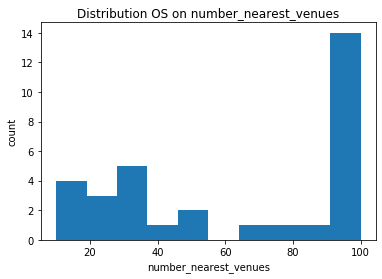

In [16]:
plt.hist(number_venues)

# set x/y labels and plot title
plt.xlabel("number_nearest_venues")
plt.ylabel("count")
plt.title("Distribution OS on number_nearest_venues")

## 4. Data Preparation and Description
### 4.1.Visualization of data on infrastructure objects around office spaces
#### Definition of classes of found objects of infrastructure
The service Foursquare offers an extremely broad classification of infrastructure facilities. For the purpose of analysis, we have aggregated the categories of objects indicated on the resource into wider classes.

In [17]:
#Addind veues class
df_venues_classes = pd.read_excel('Venues_class.xlsx')
print(df_venues_classes.columns)
#print(df_venues_classes)

Index(['categories', 'class'], dtype='object')


In [18]:
#Merge Venues' class for analysis
venues_CCm=venues_CC.copy()
for i in range (0,len(venues_CCm)):
    venues_CCm[i]=pd.merge(venues_CCm[i], df_venues_classes, on='categories')
    #print('venues_CCm[{}]'.format(i), venues_CCm[i].columns)
    #print(venues_CCm[i].head())

Next, objects were deleted whose presence is not critical for the choice of office.

In [19]:
#Deleting venues that do not affect the choice of office location
dropstr = ['Art Studies','Avto and cycle services','Books, arts and supplies shops','Business and Home services','Buildings and constructions',
           'Clothes and shoes shops','Department store','Diners','Food shops - specialized','Food shops - univercal',
           'Game shops','Goods for home and office','Health & Beauty Service','Kids and babies shops','Market',
           'Medicin and Pharmacy','Music and electronics shops','Office and business centres','Other shopes','Sport shops','Schools and univercity','Other goods','Universal Stores',
           'Transport infrustructure','Zoo and veterinarian']
for i in range (0,len(venues_CCm)):
    #print(df_of.iloc[i][0],'venues before drop',venues_CCm[i].shape[0])
    venues_CCm[i].drop(venues_CCm[i][venues_CCm[i]['class'].isin(dropstr)].index, inplace=True)
    venues_CCm[i].reset_index(inplace=True)
    del venues_CCm[i]['index']
    #print(df_of.iloc[i][0],'venues after drop',venues_CCm[i].shape[0])
    #print(venues_CCm[i].head())
    #print(venues_CCm[i].groupby('class').count())

#### Adding venues data to df_of DataFrame

In [20]:
df_of['Hotels amount'] = 0
df_of['Entertainment amount'] = 0
df_of['Pools and SPA amount'] = 0
df_of['Sport objects amount'] = 0
df_of['Banks amount'] = 0
df_of['Restorants and cafe amount'] = 0
df_of['Total venues amount'] = 0
df_of.shape

(32, 22)

In [21]:
max_venues = 0
for i in range (0,len(venues_CCm)):
    #venue_distribution = pd.value_counts(venues_CCm[i]['class'].values, sort=False)
    df_of.loc[i, 'Hotels amount'] = venues_CCm[i][venues_CCm[i]['class']=='Hotels and rest places'].count().iloc[0]
    df_of.loc[i, 'Banks amount'] = venues_CCm[i][venues_CCm[i]['class']=='Banks'].count().iloc[0]
    df_of.loc[i, 'Entertainment amount'] = venues_CCm[i][venues_CCm[i]['class']=='Theater'].count().iloc[0]+\
                                         venues_CCm[i][venues_CCm[i]['class']=='Entertainment'].count().iloc[0]+\
                                         venues_CCm[i][venues_CCm[i]['class']=='Museums and Exibitions'].count().iloc[0]+\
                                         venues_CCm[i][venues_CCm[i]['class']=='Movie Theater'].count().iloc[0]+\
                                            venues_CCm[i][venues_CCm[i]['class']=='Park and garden'].count().iloc[0]
    df_of.loc[i,'Restorants and cafe amount'] = venues_CCm[i][venues_CCm[i]['class']=='Restorants'].count().iloc[0]+\
                                                venues_CCm[i][venues_CCm[i]['class']=='Cafés'].count().iloc[0]+\
                                                  venues_CCm[i][venues_CCm[i]['class']=='Bar'].count().iloc[0]
    df_of.loc[i, 'Pools and SPA amount'] = venues_CCm[i][venues_CCm[i]['class']=='Pools and swimming'].count().iloc[0]+\
                                   venues_CCm[i][venues_CCm[i]['class']=='SPA and massage'].count().iloc[0]
    df_of.loc[i, 'Sport objects amount'] = venues_CCm[i][venues_CCm[i]['class']=='Run and play places'].count().iloc[0]+\
                                   venues_CCm[i][venues_CCm[i]['class']=='Sport studio and gym'].count().iloc[0]
    df_of.loc[i, 'Total venues amount'] = df_of.loc[i, 'Hotels amount']+df_of.loc[i, 'Banks amount']+\
                                    df_of.loc[i, 'Entertainment amount']+df_of.loc[i,'Restorants and cafe amount']+\
                                    df_of.loc[i, 'Pools and SPA amount']+df_of.loc[i, 'Sport objects amount']
    #print(i,'Total venues', df_of.loc[i, 'Total venues amount'],'hotel',df_of.loc[i, 'Hotels amount'],'restorants',df_of.loc[i, 'Restorants and cafe amount'],\
                                                  #'Entettaiment', df_of.loc[i, 'Entertainment amount'], \
                                                  #'Pools and SPA', df_of.loc[i, 'Pools and SPA amount'],\
                                                 #'Sport objects', df_of.loc[i, 'Sport objects amount'])

Text(0.5, 1.0, 'Distribution OS on number_nearest_venues')

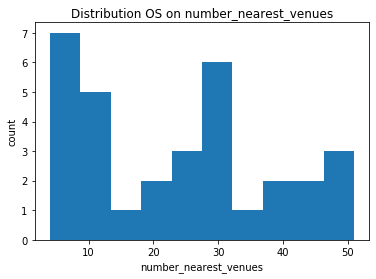

In [22]:
plt.hist(df_of['Total venues amount'])

# set x/y labels and plot title
plt.xlabel("number_nearest_venues")
plt.ylabel("count")
plt.title("Distribution OS on number_nearest_venues")

#### Get distribusion plots
For a better understanding of the characteristics of the infrastructure, for each office space, from our list, we constructed the distribution of infrastructure objects to the allocated classes.

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


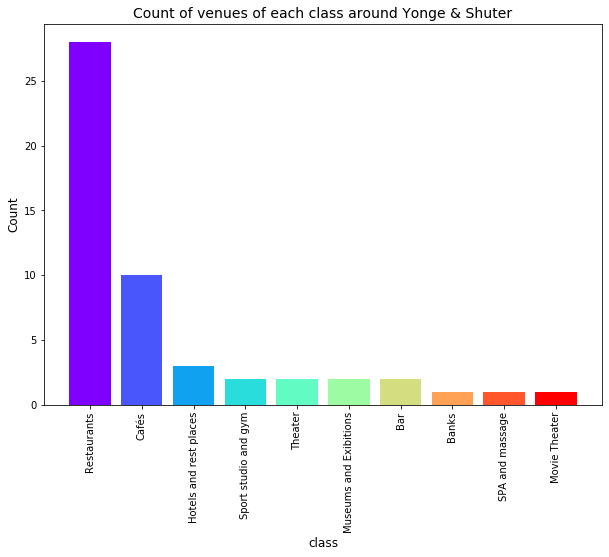

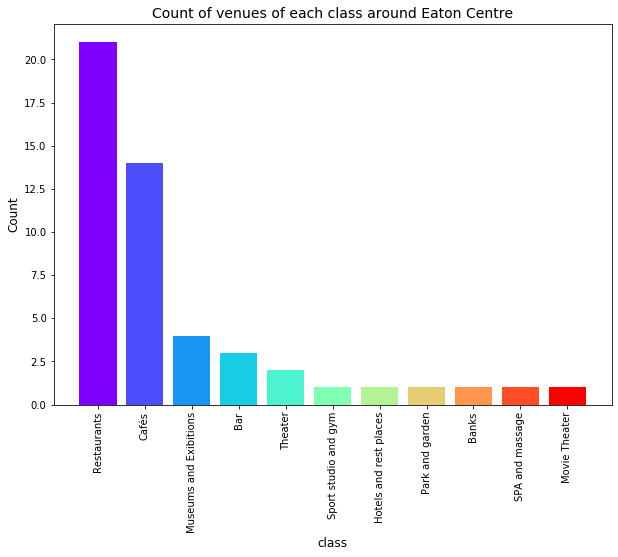

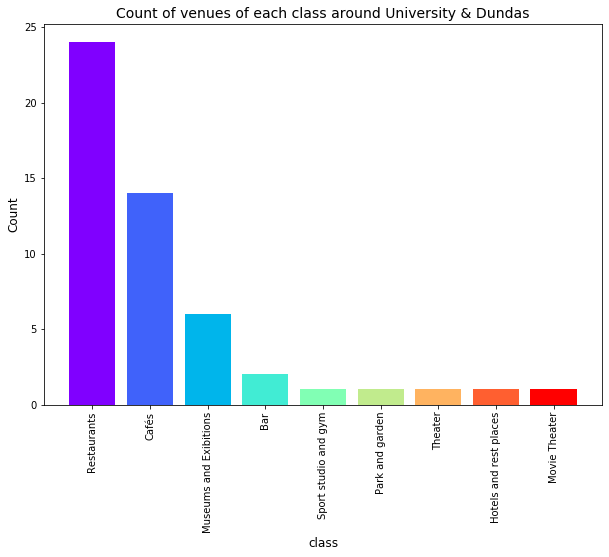

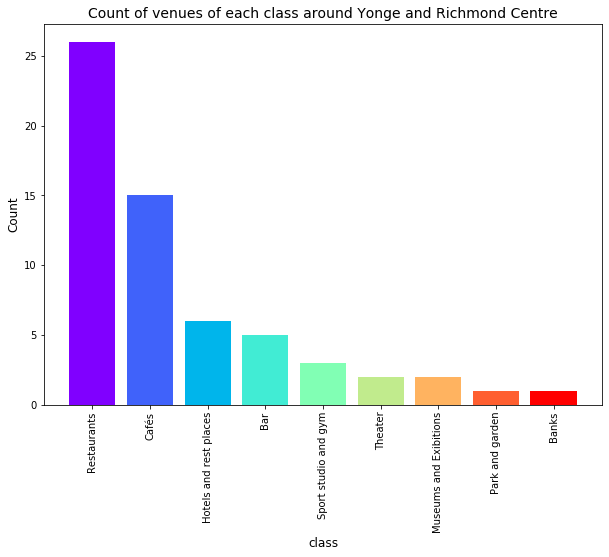

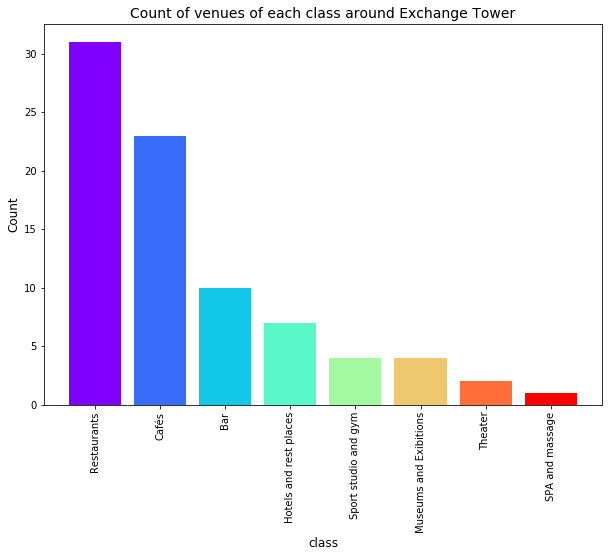

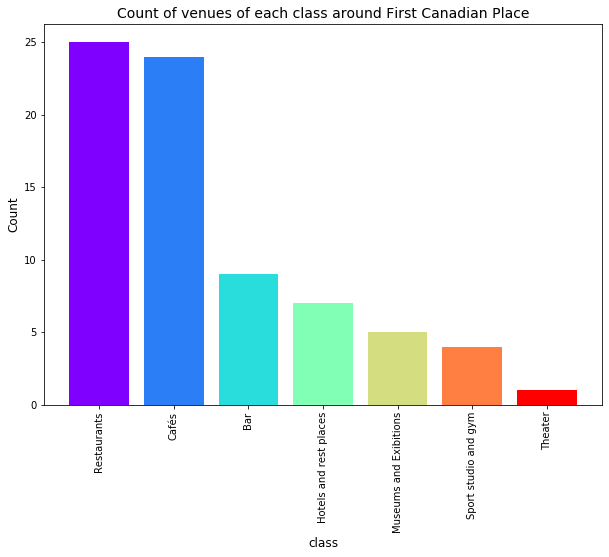

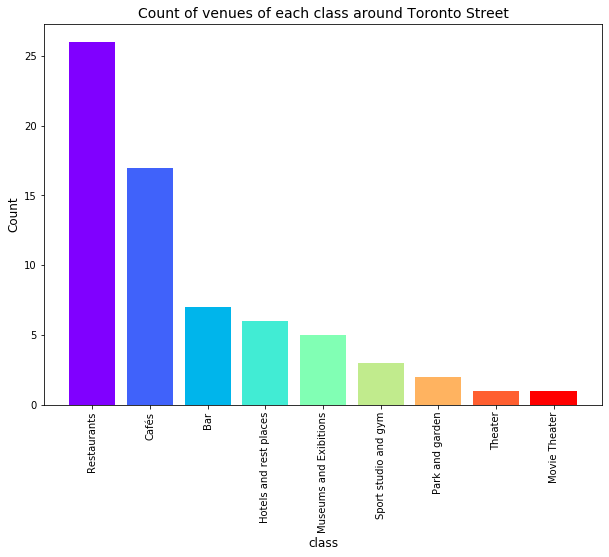

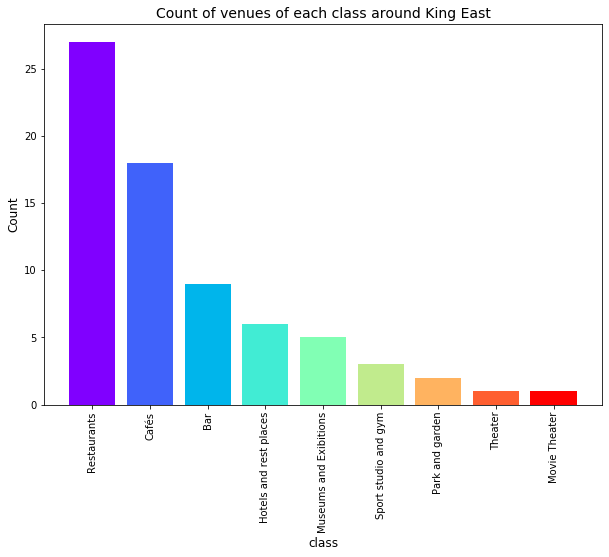

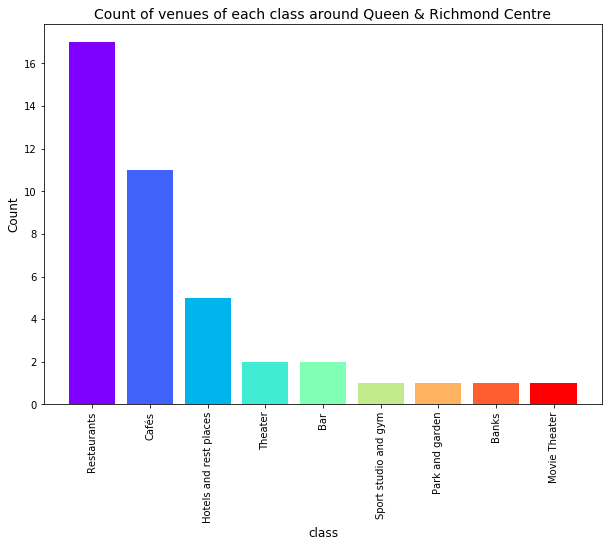

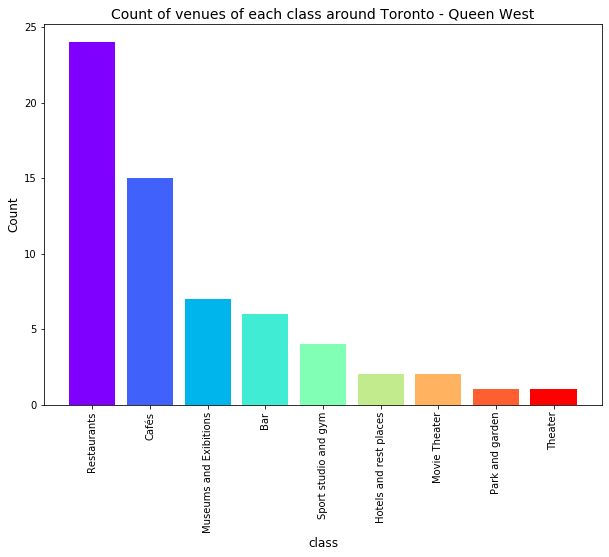

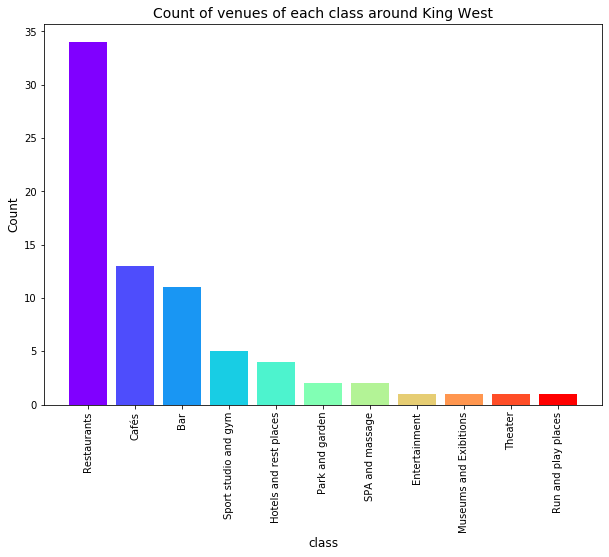

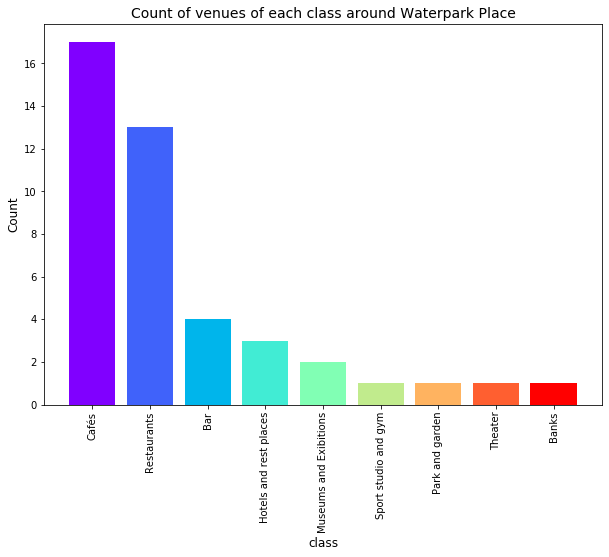

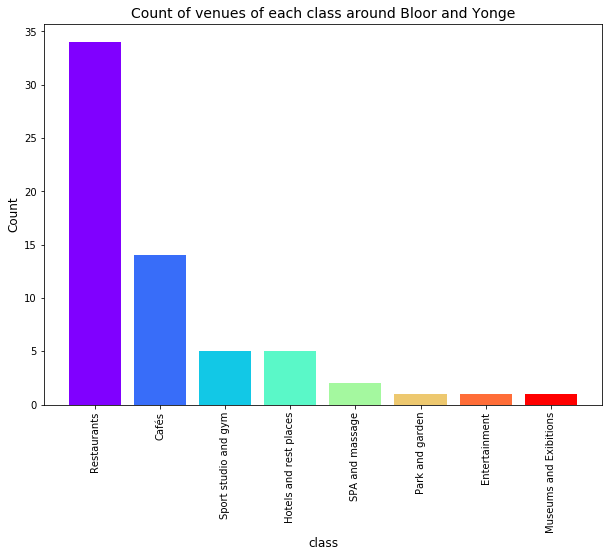

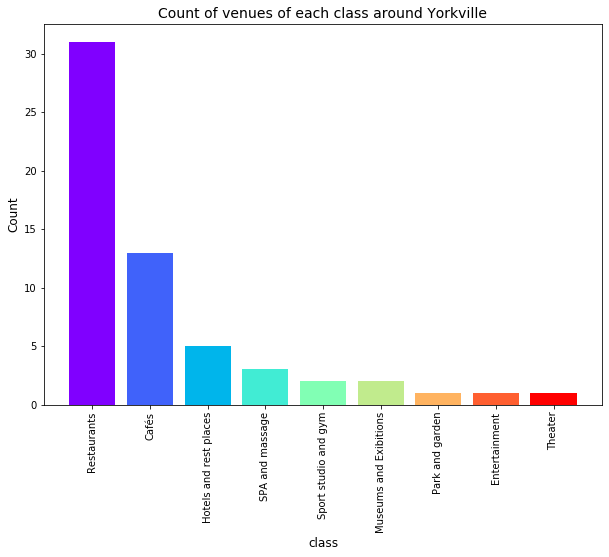

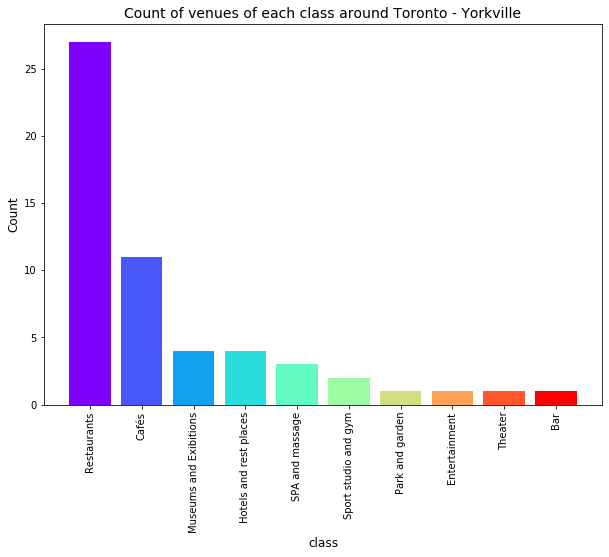

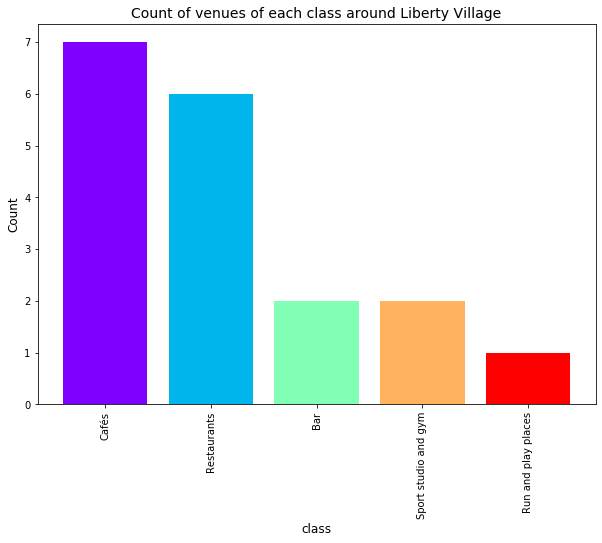

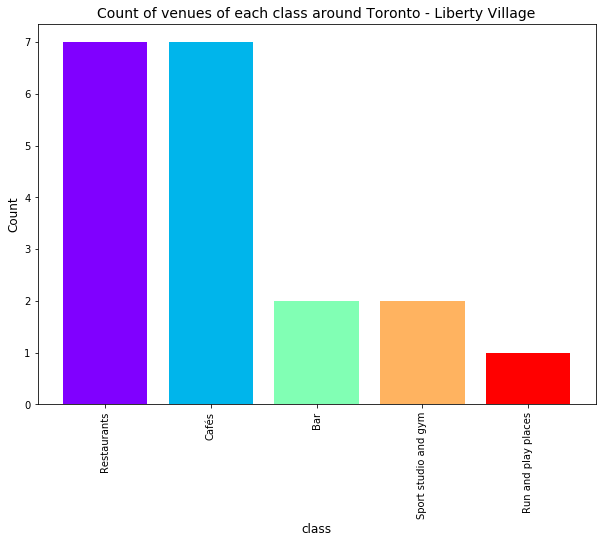

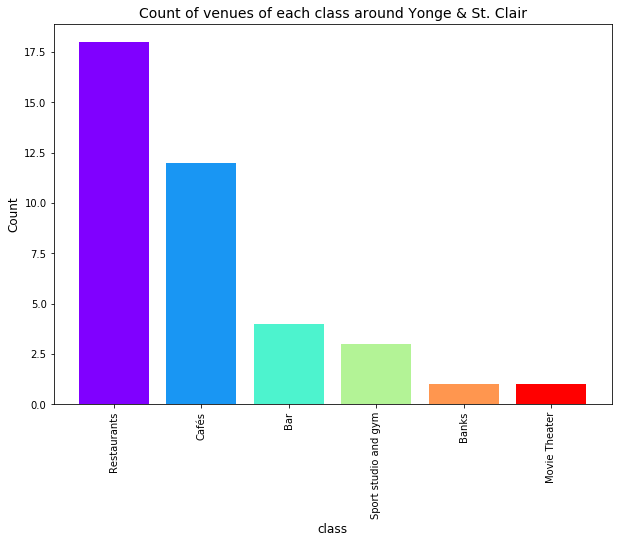

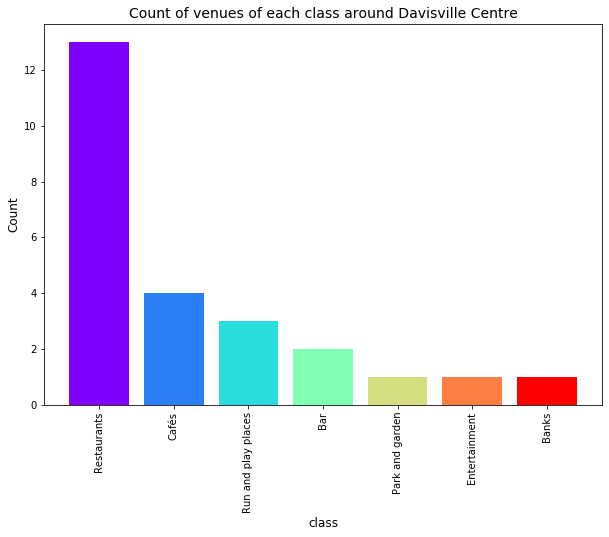

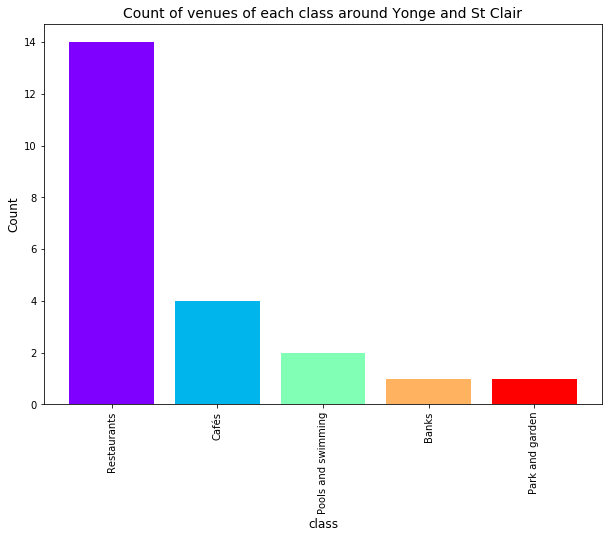

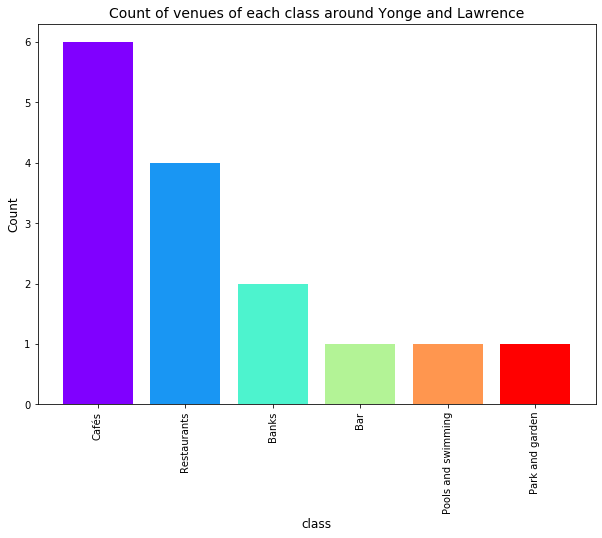

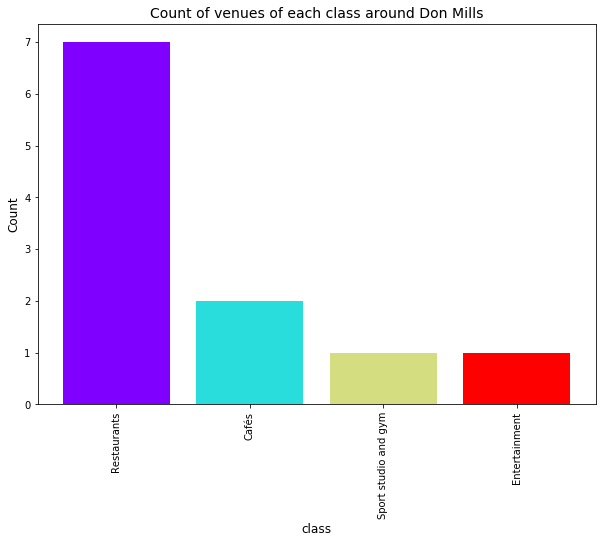

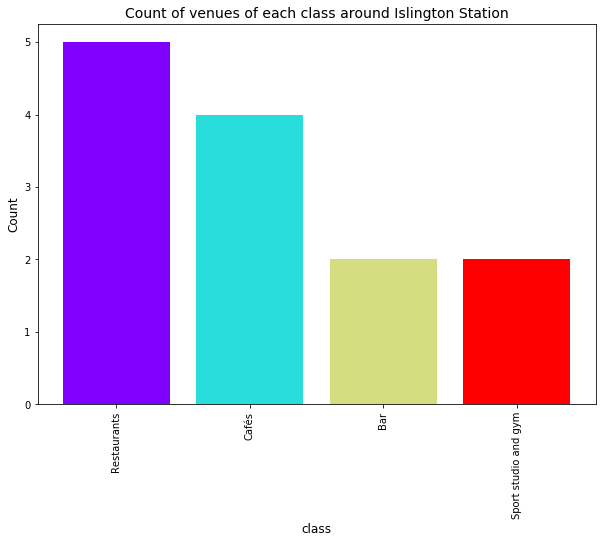

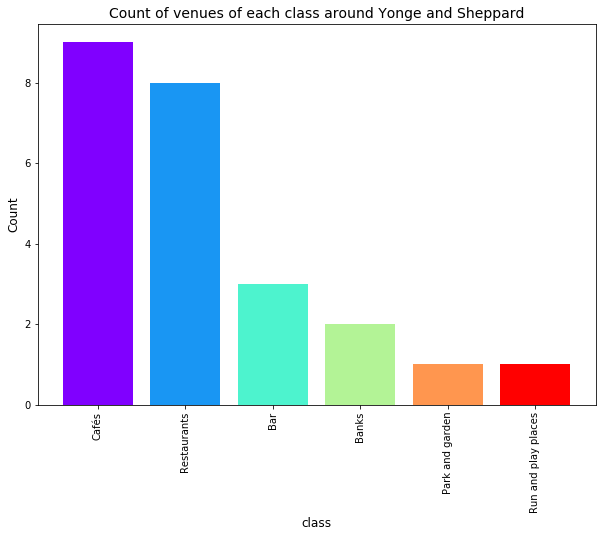

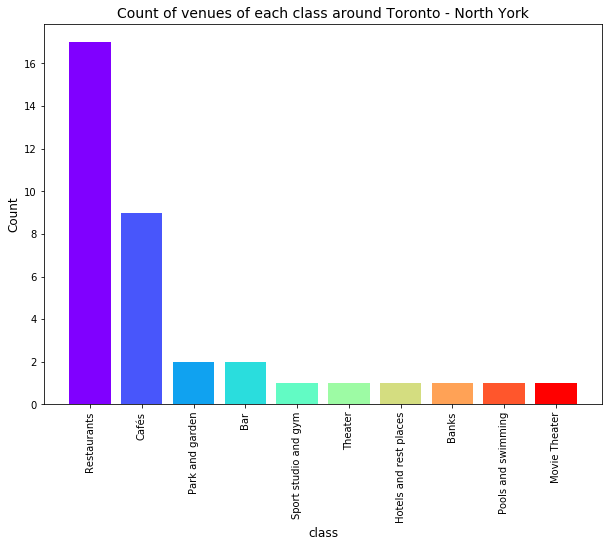

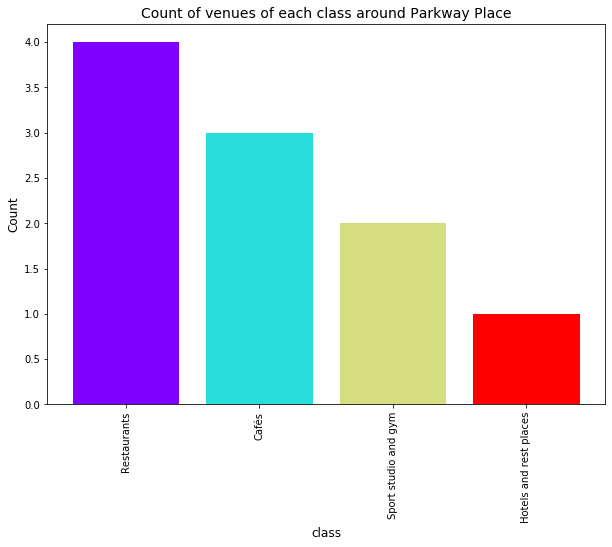

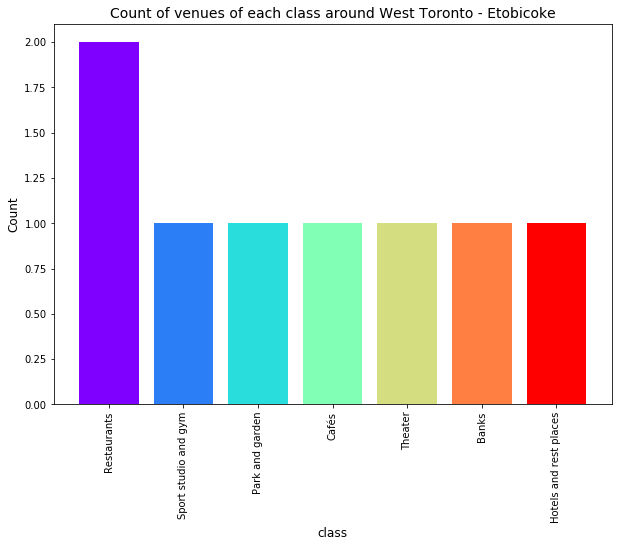

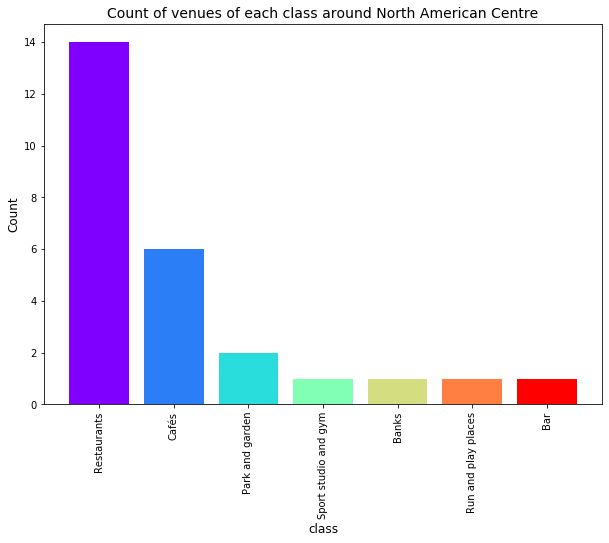

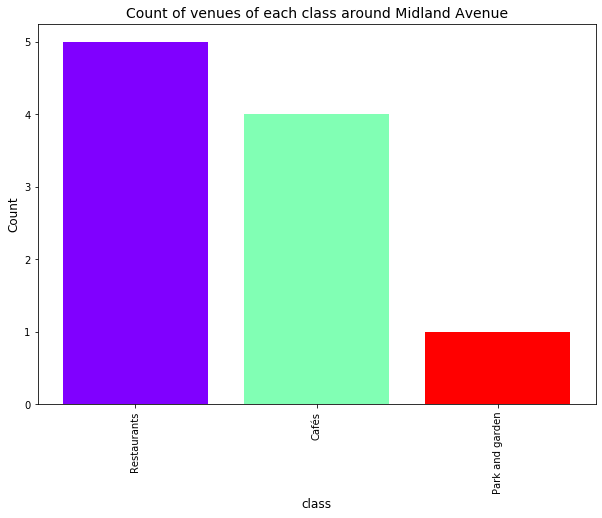

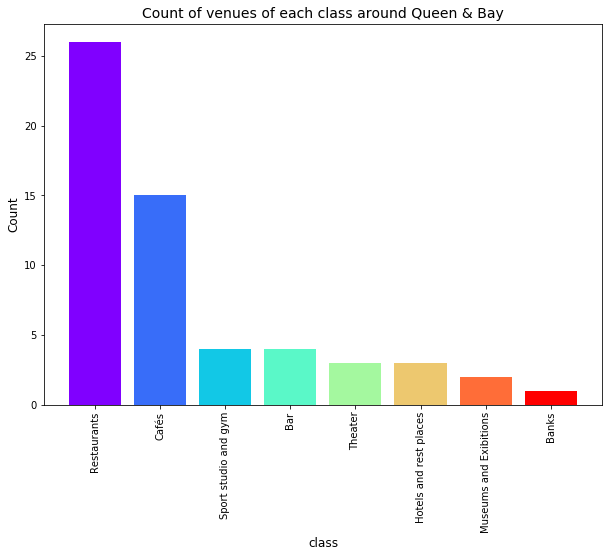

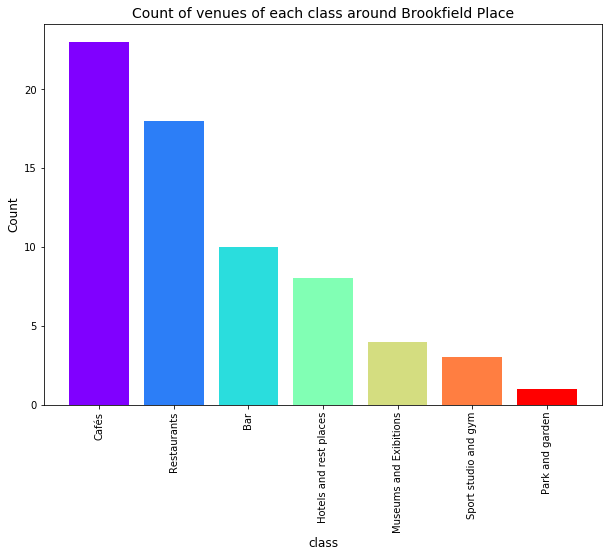

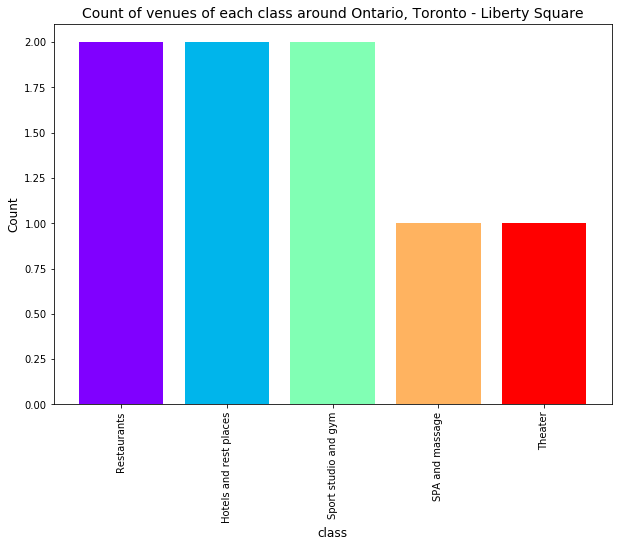

In [23]:
#Distributions venues around CC
for i in range (0,len(venues_CCm)):
    venue_distribution = venues_CCm[i]['class'].value_counts()
    #print(type(venue_distribution))
    colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
    plt.figure(figsize = (10, 7))
    plt.xticks(rotation = 90)
    plt.xlabel("class", fontsize = 12)
    plt.ylabel("Count", fontsize = 12)
    plt.title("Count of venues of each class around {}".format(df_of.iloc[i][0]), fontsize = 14)
    plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

#### According to the presented schedules, the leaders in the completeness of infrastructure have become
- Yonge & Shuter - 100 venues around,
- Eaton Centre - 100 venues around,
- Yonge and Richmond Centre - 100 venues around,
- Queen & Richmond Centre - 71 venues around,
- Waterpark Place - 77 venues around,
- Toronto - North York - 52 venues around,
- West Toronto - Etobicoke - 9 venues around,
- Queen & Bay are - 100 venues around,
Although around the West Toronto - Etobicoke found only 9 infrastructure facilities, their list is full: there is a hotel, restaurants, bank, theater and sports infrastructure.

### 4.2. Visualization project objects on Toronto map

#### Getting Toronto map from folium library

In [24]:
#Creating Toronto map
#Step 1 - geo coordinates Toronto
address = 'Toronto, CA'
geolocator = Nominatim(user_agent="ny_explorer")
location_tor = geolocator.geocode(address)
latitude_tor = location_tor.latitude
longitude_tor = location_tor.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_tor, longitude_tor))
map_toronto = folium.Map(location =[latitude_tor, longitude_tor], zoom_start=12)

The geograpical coordinate of Toronto are 43.653963, -79.387207.


#### Creating Toronto map with markers OS,CC,venues

In [25]:
# add markers OS to map
for lat, lng, label in zip(df_of['Latitude'], df_of['Longitude'], df_of['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
# add markers CC to map
for lat, lng, label in zip(df_cc['Latitude'], df_cc['Longitude'], df_cc['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
color_map = {'Bar':'brown',
             'Banks':'violet',
             'Cafés':'brown',
             'Entertainment':'yellow',
             'Hotels and rest places':'green', 
             'Movie Theater':'yellow',
             'Museums and Exibitions':'yellow',
             'Office and business centres':'red',
             'Park and garden':'yellow',
             'Pools and swimming':'orange',
             'Restaurants':'brown',
             'Run and play places':'orange',
             'SPA and massage':'violet',
             'Sport studio and gym':'orange',
             'Theater':'yellow'}
# add venues to the map
for i in range (0,len(venues_CCm)):
    for venue, cl, latitude, longitude in zip(venues_CCm[i]['name'],
                                    venues_CCm[i]['class'],
                                    venues_CCm[i]['lat'],
                                    venues_CCm[i]['lng']):
        label = folium.Popup(str(venue), parse_html=True)
        folium.CircleMarker(
            [latitude, longitude],
            radius=5,
            popup=label,
            color = color_map[cl],
            fill=True,
            fill_color=color_map[cl],
            fill_opacity=0.7,
            parse_html=False).add_to(map_toronto)    
map_toronto

## 5. Methodolgy: Modeling and Evaluation
Our project involves the creation of a methodology for ranking potential office spaces by their attractiveness to the customer, as well as depending on the price terms of the lease. For ranking purposes it is necessary to develop an indicator of the attractiveness of the rental object. We will call this indicator - __Integration OS Rating__
In our case, the customer is a company that organizes conferences, symposia, seminars and other types of collective meetings and trainings. To form an integral indicator of attractiveness, we decided to use 2 components: 
- the nearest Conference Center Availability and Quality indicator 
- the Infrastructure Quality Indicator. 
Further, these indicators will be constructed. Then our office objects will be clustered taking into account their locations, the  quality indicators and price characteristics.

### 5.1 Creating Conference Center Availability and Quality indicator
 

#### Integral rating CC methodology 
The method of forming the integral rating of the conference center is based on the rating of this conference center, calculated on the basis of customer surveys on resource _EventSource.ca_. Further, this rating is adjusted in accordance with the rental price level of the conference center premises (coefficient k1) and the proximity of this object to the office space ( coefficient k2). The distance to the conference center more than 10 km is considered unacceptable and leads to a reset of the conference center rating.

In [26]:
df_of['Integration CC Rating'] = 0.0
df_of['Integration venues Rating'] = 0.0
#df_of.shape

In [27]:
for i in df_of.index:
    CC_rating_base = df_of.iloc[i]['Nearest CC range']
    if (CC_rating_base==0):
        CC_rating_base=2.5
    if (df_of.loc[i, 'Nearest CC']=='' or df_of.loc[i, 'Nearest CC price rate']==''):
        k1=0
    else:
        if(df_of.loc[i, 'Nearest CC price rate']=='high'):
            k1 = 0.5
        elif(df_of.loc[i, 'Nearest CC price rate']=='middle'):
            k1=0.75
        else:
            k1=1
    if(df_of.loc[i, 'Nearest CC distance']>10000):
           k2 = 0
    elif(df_of.loc[i, 'Nearest CC distance']>5000):
           k2 = 0.25
    elif(df_of.loc[i, 'Nearest CC distance']>3000):
           k2 = 0.5
    elif(df_of.loc[i, 'Nearest CC distance']>1000):
          k2 = 0.75
    else:
          k2=1   
    CC_rating=round(CC_rating_base*k1*k2,2)
    df_of.loc[i,'Integration CC Rating'] = CC_rating
   #print(i, 'CC_rating=', CC_rating, 'CC_rating_base=', CC_rating_base, 'k1=', k1,'k2=', k2)

Text(0.5, 1.0, 'CC Rating distribution')

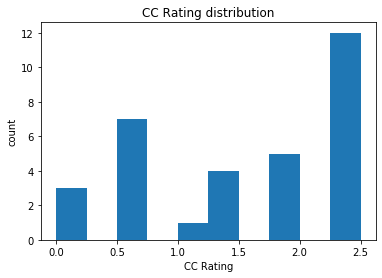

In [28]:
plt.hist(df_of['Integration CC Rating'])

# set x/y labels and plot title
plt.xlabel("CC Rating")
plt.ylabel("count")
plt.title("CC Rating distribution")

### 5.2 Creating Conference Center Availability and Quality indicator
 

#### Infrastructure QI methodology 
The method of forming the integral rating of the infrastructure is based on the average number of infrastructure facilities located within a radius of 500 m around the office space. Further, this rating is adjusted in accordance with the presence in the neighborhood of hotels, restaurants, swimming pools or SPA, bank (coefficients k3, k4, k5, k6).

In [29]:
mean_venues = df_of['Total venues amount'].describe()[1]
for i in df_of.index:
    Ven_rating_base = min(5.0*(df_of.iloc[i]['Total venues amount']/mean_venues),5.0) 
    if(df_of.loc[i, 'Hotels amount'] == 0):
        k3 = 0.25
    elif(df_of.loc[i, 'Hotels amount']==1):
        k3 = 0.5
    else:
        k3 = 1.0
    if(df_of.loc[i, 'Restorants and cafe amount'] < 2):
        k4 = 0.5
    else:
        k4 = 1.0
    if(df_of.loc[i, 'Pools and SPA amount'] == 0):
        k5 = 0.75
    else:
        k5 = 1
    if(df_of.loc[i, 'Banks amount'] == 0):
        k6 = 0.75
    else:
        k6 = 1.0
    Ven_rating = round(Ven_rating_base*((k3+k4+k5+k6)/4),1)
    df_of.loc[i,'Integration venues Rating'] = Ven_rating
    #print(i, 'Ven_rating=', Ven_rating, 'Ven_rating_base=', Ven_rating_base,'k3=', k3,'k4=', k4,'k5=', k5,'k6=', k6)

Text(0.5, 1.0, 'Integration venues Rating distribution')

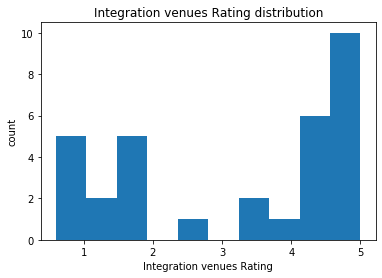

In [30]:
plt.hist(df_of['Integration venues Rating'])

# set x/y labels and plot title
plt.xlabel("Integration venues Rating")
plt.ylabel("count")
plt.title("Integration venues Rating distribution")

### 5.3. Distribution OS prices
The third factor that determines the choice of office space is the rental price. Consider how our objects are distributed by price level, as well as average prices.

In [34]:
PR_c =[]
PR_c.append(df_of[df_of['Price_range']=='low'].count().iloc[0])
PR_c.append(df_of[df_of['Price_range']=='middle'].count().iloc[0])
PR_c.append(df_of[df_of['Price_range']=='high'].count().iloc[0])
PR_c.append(df_of[df_of['Price_range']=='very high'].count().iloc[0])
print(type(PR_c),PR_c)
x=['low','middle','high','very high']

<class 'list'> [4, 2, 15, 11]


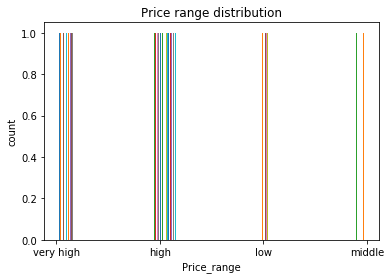

In [37]:
plt.hist(df_of['Price_range'])

# set x/y labels and plot title
plt.xlabel("Price_range")
plt.ylabel("count")
plt.title("Price range distribution")

plt.show()

Text(0.5, 1.0, 'Average price distribution')

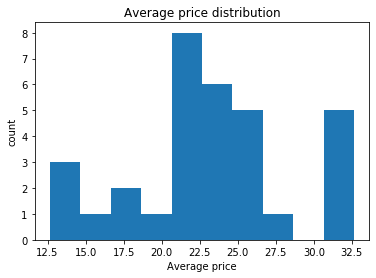

In [38]:
plt.hist(df_of['Average price'])

# set x/y labels and plot title
plt.xlabel("Average price")
plt.ylabel("count")
plt.title("Average price distribution")

### 5.4. Joint distribution of CC_rating's, Ven_rating's and OS prices
We visualize the distribution of our office spaces in three ways, which will be used in the process of clustering
- conference center rating (R_CC) 
- infrastructure rating (R_Inf) 
- Average price.

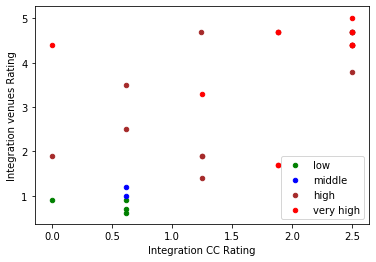

In [39]:
ax = df_of[df_of['Price_range'] == 'low'][0:31].plot(kind='scatter', x='Integration CC Rating', y='Integration venues Rating',\
                                                     color='green', label='low');
df_of[df_of['Price_range'] == 'middle'][0:31].plot(kind='scatter', x='Integration CC Rating', y='Integration venues Rating',\
                                                     color='Blue', label='middle', ax=ax);
df_of[df_of['Price_range'] == 'high'][0:31].plot(kind='scatter', x='Integration CC Rating', y='Integration venues Rating',\
                                                     color='brown', label='high', ax=ax);
df_of[df_of['Price_range'] == 'very high'][0:31].plot(kind='scatter', x='Integration CC Rating', y='Integration venues Rating',\
                                                     color='red', label='very high', ax=ax);
plt.show()

__An important result__

In the figure above we see three types of objects: 
- with low quality ratings and low prices, 
- with low ratings and high prices, 
- with high ratings and high prices. 
This determined the choice of the number of classes for clustering.

### 5.6. Clustering
#### Machine learning
We will now cluster all these office spaces based on their average price, Integration OS Rating and locations. We'll cluster the object into three separate groups, since the previous data analysis showed exactly the most likely number of clusters.

In [56]:
from sklearn.cluster import KMeans
NO_OF_CLUSTERS = 3

clustering = df_of.drop(['Name', 'Link', 'Type', 'Postcode', 'Location','Adress', 'Price_range', 'Rating', 'Nearest CC',\
       'Nearest CC distance', 'Nearest CC range', 'Nearest CC price rate',\
       'Hotels amount', 'Entertainment amount', 'Pools and SPA amount',\
       'Sport objects amount', 'Banks amount', 'Restorants and cafe amount',\
       'Total venues amount'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
df_of.insert(0, 'cluster_labels', kMeans.labels_)

In [54]:
df_of.columns

Index(['cluster_labels', 'Name', 'Link', 'Type', 'Postcode', 'Location',
       'Adress', 'Latitude', 'Longitude', 'Price_range', 'Rating',
       'Average price', 'Nearest CC', 'Nearest CC distance',
       'Nearest CC range', 'Nearest CC price rate', 'Hotels amount',
       'Entertainment amount', 'Pools and SPA amount', 'Sport objects amount',
       'Banks amount', 'Restorants and cafe amount', 'Total venues amount',
       'Integration CC Rating', 'Integration venues Rating'],
      dtype='object')

In [55]:
df_of = df_of.drop(['cluster_labels'], 1)

#### Analize first classter

## 6. Results and Discussion

#### Location of clusters on the Toronto map
- the first is green, 
- the second is red, 
- the third is blue

In [68]:
map_toronto = folium.Map(location =[latitude_tor, longitude_tor], zoom_start=10)
color_map = { 0: 'green', 1: 'red', 2: 'blue'}

# add venues to the map
markers_colors = []
for name, address, cluster, latitude, longitude in zip(df_of['Name'], 
                                                        df_of['Adress'], 
                                                        df_of['cluster_labels'], 
                                                        df_of['Latitude'], 
                                                        df_of['Longitude']):
    label = folium.Popup(str(name) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(map_toronto)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(map_toronto)

map_toronto.save("Venues Clusters.html")
map_toronto

We see that geographically the objects of the first cluster are located closer to the coast and the historic center of Toronto, the objects of the second and third cluster are mostly removed inland

In [57]:
first_claster = df_of[df_of['cluster_labels']==0]
first_claster.reset_index(inplace=True)
first_claster = first_claster.drop(['index'], 1)
first_claster

,cluster_labels,Name,Link,Type,Postcode,Location,Adress,Latitude,Longitude,Price_range,Rating,Average price,Nearest CC,Nearest CC distance,Nearest CC range,Nearest CC price rate,Hotels amount,Entertainment amount,Pools and SPA amount,Sport objects amount,Banks amount,Restorants and cafe amount,Total venues amount,Integration CC Rating,Integration venues Rating
0,0,First Canadian Place,/office-space/canada/ontario/toronto/toronto-f...,OfficeSpace,M5X 1C9,"Toronto,Ontario,Canada",100 King Street West,43.648380,-79.381740,very high,without rating,32.65,Oakham House,220.48,5.0,high,7,6,0,4,0,33,50,2.50,4.4
1,0,Toronto - Queen West,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M5T 1X5,"Toronto,Ontario,Canada",180 John Street,43.650679,-79.391675,very high,without rating,32.65,Oakham House,648.24,5.0,high,2,11,0,4,0,21,38,2.50,4.4
2,0,Waterpark Place,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M5J 0B8,"Toronto,Ontario,Canada",88 Queens Quay West,43.641070,-79.378070,very high,without rating,32.65,Oakham House,1036.37,5.0,high,3,4,0,1,1,21,30,1.88,4.7
3,0,Toronto - Liberty Village,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M6K 3E4,"Toronto,Ontario,Canada",80 Atlantic Ave,43.638673,-79.421219,very high,without rating,32.65,Oakham House,2582.86,5.0,high,0,0,0,3,0,9,12,1.88,1.7
4,0,Yonge & St. Clair,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M4V 1L5,"Toronto,Ontario,Canada",2 St. Clair Avenue West,43.688290,-79.394590,very high,without rating,28.05,Oakham House,3103.54,5.0,high,0,1,0,3,1,16,21,1.25,3.3
5,0,Brookfield Place,/office-space/canada/ontario/toronto/toronto-b...,OfficeSpace,M5J 2S1,"Toronto,Ontario,Canada",TD Canada Trust Tower,43.646460,-79.379170,very high,High demanded,32.65,Oakham House,14079.54,5.0,high,8,5,0,3,0,33,49,0.00,4.4


In [58]:
first_claster['Price_range'].unique()

array(['very high'], dtype=object)

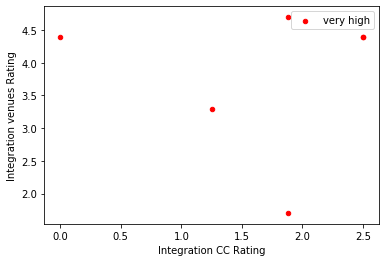

In [59]:
ax = df_first_claster[df_first_claster['Price_range'] == 'very high'][0:31].plot(kind='scatter', x='Integration CC Rating', y='Integration venues Rating',\
                                                     color='red', label='very high');
plt.show()

In [60]:
second_claster = df_of[df_of['cluster_labels']==1]
second_claster.reset_index(inplace=True)
second_claster = second_claster.drop(['index'], 1)
second_claster

,cluster_labels,Name,Link,Type,Postcode,Location,Adress,Latitude,Longitude,Price_range,Rating,Average price,Nearest CC,Nearest CC distance,Nearest CC range,Nearest CC price rate,Hotels amount,Entertainment amount,Pools and SPA amount,Sport objects amount,Banks amount,Restorants and cafe amount,Total venues amount,Integration CC Rating,Integration venues Rating
0,1,Yonge & Shuter,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M5B 1N9,"Toronto,Ontario,Canada",229 Yonge Street,43.654280,-79.380030,very high,without rating,25.10,Twenty Toronto Street,528.85,0.00,low,3,5,1,2,1,12,24,2.50,5.0
1,1,Eaton Centre,/office-space/canada/ontario/toronto/toronto-e...,OfficeSpace,M5G 1Z3,"Toronto,Ontario,Canada",1 Dundas Street West,43.655990,-79.381650,very high,without rating,26.50,Twenty Toronto Street,759.19,0.00,low,1,8,1,1,1,17,29,2.50,4.4
2,1,University & Dundas,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M5G 1Y8,"Toronto,Ontario,Canada",439 University Avenue,43.654350,-79.387940,high,without rating,21.65,Oakham House,749.70,5.00,high,1,9,0,1,0,16,27,2.50,3.8
3,1,Yonge and Richmond Centre,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M5C 2W7,"Toronto,Ontario,Canada",151 Yonge Street,43.651453,-79.378628,high,without rating,23.75,Twenty Toronto Street,212.09,0.00,low,6,5,0,3,1,20,35,2.50,4.7
4,1,Exchange Tower,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M5X 1E3,"Toronto,Ontario,Canada",130 King Street West,43.648340,-79.383310,high,without rating,23.75,Oakham House,95.71,5.00,high,7,6,1,4,0,33,51,2.50,4.7
5,1,Toronto Street,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M5C 2C5,"Toronto,Ontario,Canada",36 Toronto Street,43.650395,-79.376708,high,without rating,21.65,Twenty Toronto Street,21.30,0.00,low,6,9,0,3,0,24,42,2.50,4.4
6,1,King East,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M5C 3B2,"Toronto,Ontario,Canada",36 King Street East,43.649480,-79.376400,high,without rating,20.50,Twenty Toronto Street,83.53,0.00,low,6,9,0,3,0,27,45,2.50,4.4
7,1,Queen & Richmond Centre,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M5C 1S2,"Toronto,Ontario,Canada",111 Queen Street East,43.653430,-79.374480,very high,without rating,26.50,Twenty Toronto Street,397.30,0.00,low,5,4,0,1,1,13,24,2.50,4.7
8,1,King West,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M5V 1L9,"Toronto,Ontario,Canada",500 King Street West,43.645180,-79.396680,high,without rating,23.75,Oakham House,394.32,5.00,high,4,5,2,6,0,24,41,2.50,4.7
9,1,Bloor and Yonge,/office-space/canada/ontario/toronto/toronto-b...,OfficeSpace,M4W 3E2,"Toronto,Ontario,Canada",2 Bloor Street West,43.670180,-79.387100,high,without rating,24.25,Oakham House,935.55,5.00,high,5,3,2,5,0,14,29,2.50,4.7


The first cluster included office premises from the highest price category. These objects have the highest 'Integration venues Rating' and / or 'Integration CC Rating'

In [61]:
second_claster.shape

(20, 25)

In [62]:
second_claster['Price_range'].unique()

array(['very high', 'high'], dtype=object)

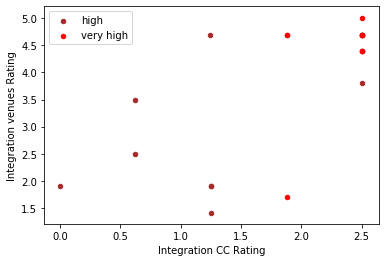

In [63]:
ax = second_claster[second_claster['Price_range'] == 'high'][0:31].plot(kind='scatter', x='Integration CC Rating', y='Integration venues Rating',\
                                                     color='brown', label='high');
second_claster[second_claster['Price_range'] == 'very high'][0:31].plot(kind='scatter', x='Integration CC Rating', y='Integration venues Rating',\
                                                     color='red', label='very high', ax=ax);
plt.show()

In [64]:
third_claster = df_of[df_of['cluster_labels']==2]
third_claster

,cluster_labels,Name,Link,Type,Postcode,Location,Adress,Latitude,Longitude,Price_range,Rating,Average price,Nearest CC,Nearest CC distance,Nearest CC range,Nearest CC price rate,Hotels amount,Entertainment amount,Pools and SPA amount,Sport objects amount,Banks amount,Restorants and cafe amount,Total venues amount,Integration CC Rating,Integration venues Rating
21,2,Don Mills,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M3C 1W3,"Toronto,Ontario,Canada",895 Don Mills Road,43.726975,-79.340372,low,without rating,14.35,Twenty Toronto Street,5634.49,0.0,low,0,1,0,1,0,2,4,0.62,0.6
22,2,Islington Station,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M8X 2X9,"Toronto,Ontario,Canada",3250 Bloor Street West,43.645420,-79.521000,middle,without rating,17.75,Oakham House,5993.46,5.0,high,0,0,0,2,0,6,8,0.62,1.2
25,2,Parkway Place,/office-space/canada/ontario/toronto/toronto-p...,OfficeSpace,M2J 4R3,"Toronto,Ontario,Canada",251 Consumers Road,43.770130,-79.330440,low,without rating,14.35,Twenty Toronto Street,9022.12,0.0,low,1,0,0,2,0,3,6,0.62,0.9
26,2,West Toronto - Etobicoke,/office-space/canada/ontario/toronto/toronto-w...,OfficeSpace,M9B 6H7,"Toronto,Ontario,Canada",10 Four Seasons Place,43.646260,-79.559370,low,without rating,15.05,Oakham House,10994.01,5.0,high,1,2,0,1,1,1,6,0.00,0.9
28,2,Midland Avenue,/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,M1V 0B8,"Toronto,Ontario,Canada",3660 Midland Avenue,43.813340,-79.291670,low,without rating,12.65,The Bram & Bluma Appel Salon,9625.20,5.0,high,0,1,0,0,0,4,5,0.62,0.7
31,2,"Ontario, Toronto - Liberty Square",/office-space/canada/ontario/toronto/ontario-t...,OfficeSpace,L3R 0M3,"Toronto,Ontario,Canada",3601 Highway 7,43.853868,-79.338341,middle,High demanded,17.30,The Bram & Bluma Appel Salon,9172.91,5.0,high,2,1,1,2,0,0,6,0.62,1.0


The second cluster included office premises from the top two price categories. These objects have high or average values of 'Integration venues Rating' and 'Integration CC Rating'

In [65]:
third_claster.shape

(6, 25)

In [66]:
third_claster['Price_range'].unique()

array(['low', 'middle'], dtype=object)

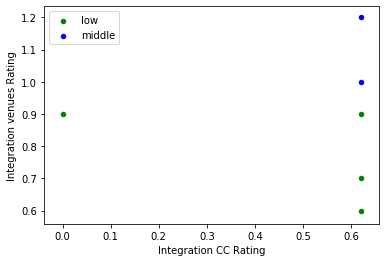

In [67]:
ax = third_claster[third_claster['Price_range'] == 'low'][0:31].plot(kind='scatter', x='Integration CC Rating', y='Integration venues Rating',\
                                                     color='green', label='low');
third_claster[third_claster['Price_range'] == 'middle'][0:31].plot(kind='scatter', x='Integration CC Rating', y='Integration venues Rating',\
                                                     color='Blue', label='middle', ax=ax);
plt.show()

The third cluster includes office premises from the two lower price categories. These objects have the lowest values of 'Integration venues Rating' and 'Integration of CC Rating'

## 7. Conclusion

Machine learning allowed us to identify clusters of office spaces that differ in the level of prices and quality of service. Although objects with low prices were included in the trey cluster, their quality characteristics least meet the requirements of the client. The second class will be most preferable, since it includes objects with first-class characteristics, among which you can choose objects with an acceptable price level. For example, we can recommend __Exchange Tower__. The third class contains premium properties with a high level of demand for them, which determines the highest rental prices.

Near the __Exchange Tower__ there is 
- a high-class Oakham House conference center, 
- 7 hotels, 
- 33 restaurants and cafes, 
- a swimming pool. 
OS has 
- an Integration CC Rating of 2.5 
- an Integration Venues Rating of 4.7

Thus, we have solved the task of developing a methodology for finding office space that meets the criteria for customers. Using information from the FouthSquere resource has proven extremely useful.